In [32]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [33]:
# 날씨 관련 데이터로드
weather_df = pd.read_csv("weather_df.csv")
weather_df.drop(columns='Unnamed: 0', inplace=True)
weather_df.head()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0


In [34]:
# 전력량 관련 데이터 로드
power_kw_df = pd.read_csv("power_usage.csv")
power_kw_df.drop(columns='Unnamed: 0', inplace=True)
power_kw_df.head()

,year,month,usage
0,2016,1,753434128
1,2016,2,756942825
2,2016,3,714022910
3,2016,4,675078079
4,2016,5,630983018


In [35]:
kw_df = pd.merge(weather_df, power_kw_df, how='left', on=['year', 'month'])
kw_df.head()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825
2,2016,3,8.4,60,55.2,4.1,520.95,0.0,714022910
3,2016,4,15.5,66,185.0,5.8,541.64,0.0,675078079
4,2016,5,19.8,65,104.5,5.2,681.60,0.0,630983018


In [36]:
# 결측치 유무 확인
kw_df.isnull().sum()

year              0
month             0
temp              0
Humidity_mean     0
rainfall_total    0
cloud             0
solar             0
snow              0
usage             0
dtype: int64

In [37]:
# 데이터 기초통계량 확인
kw_df.describe()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01
mean,2019.000000,6.500000,14.753571,70.428571,107.540476,5.344048,462.748333,1.809524,7.290542e+08
std,2.012012,3.472786,8.933320,10.019602,117.916294,1.069777,133.913445,4.945209,6.234161e+07
min,2016.000000,1.000000,-0.200000,52.000000,0.300000,3.300000,241.720000,0.000000,6.108654e+08
25%,2017.000000,3.750000,6.875000,62.000000,33.725000,4.600000,343.127500,0.000000,6.810900e+08
50%,2019.000000,6.500000,15.500000,68.500000,76.850000,5.100000,460.300000,0.000000,7.177382e+08
75%,2021.000000,9.250000,23.000000,79.000000,131.250000,6.125000,570.310000,0.000000,7.652902e+08
max,2022.000000,12.000000,28.400000,91.000000,738.100000,8.700000,770.490000,32.900000,8.939148e+08


In [38]:
kw_df.columns

Index(['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'],
      dtype='object')

## 1. matplotlib 산점도

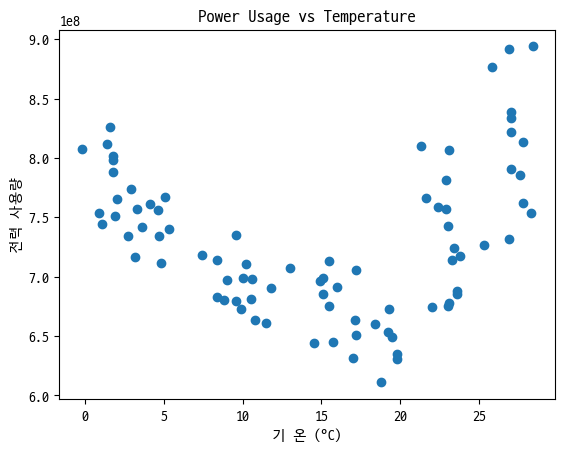

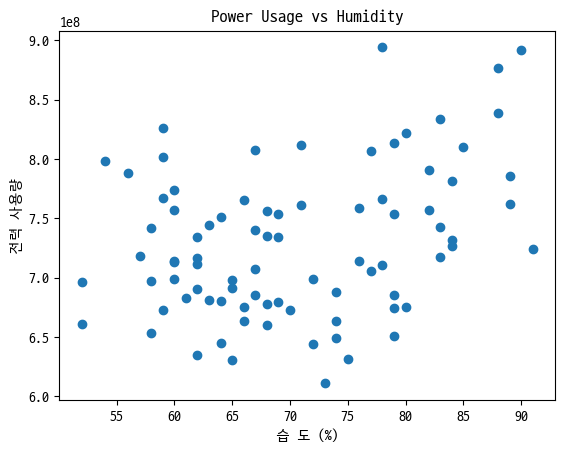

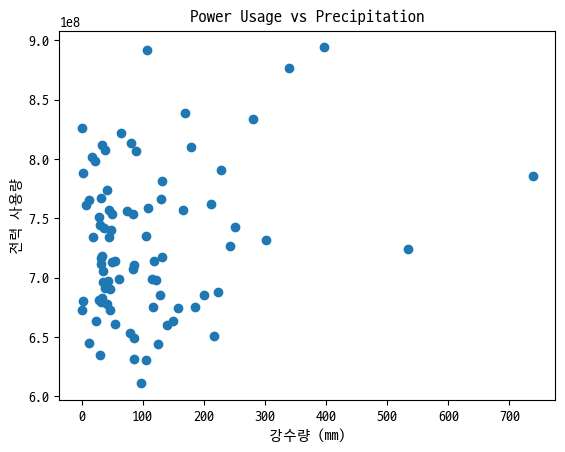

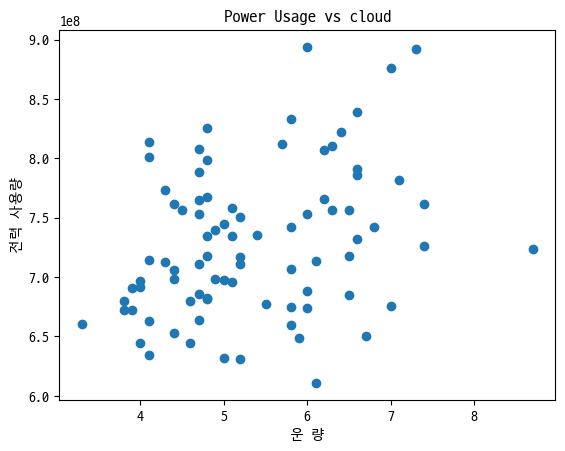

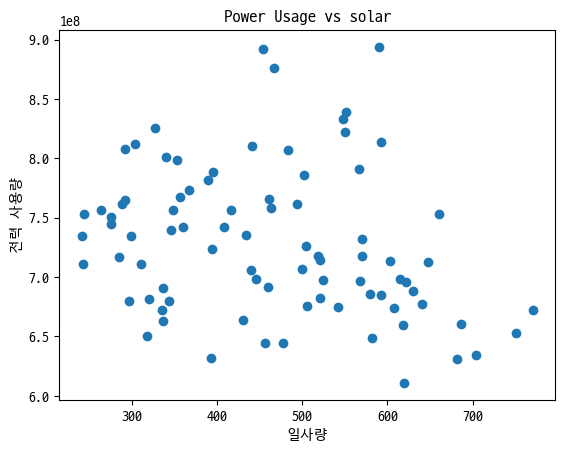

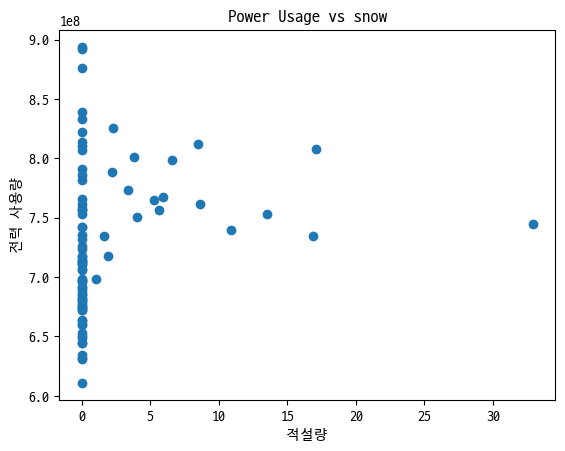

In [39]:
# 기온, 사용량
plt.scatter(kw_df['temp'], kw_df['usage'])
plt.xlabel('기 온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()

# 습도, 사용량
plt.scatter(kw_df['Humidity_mean'], kw_df['usage'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(kw_df['rainfall_total'], kw_df['usage'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(kw_df['cloud'], kw_df['usage'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(kw_df['solar'], kw_df['usage'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# 적설량, 사용량
plt.scatter(kw_df['snow'], kw_df['usage'])
plt.xlabel('적설량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs snow')
plt.show()

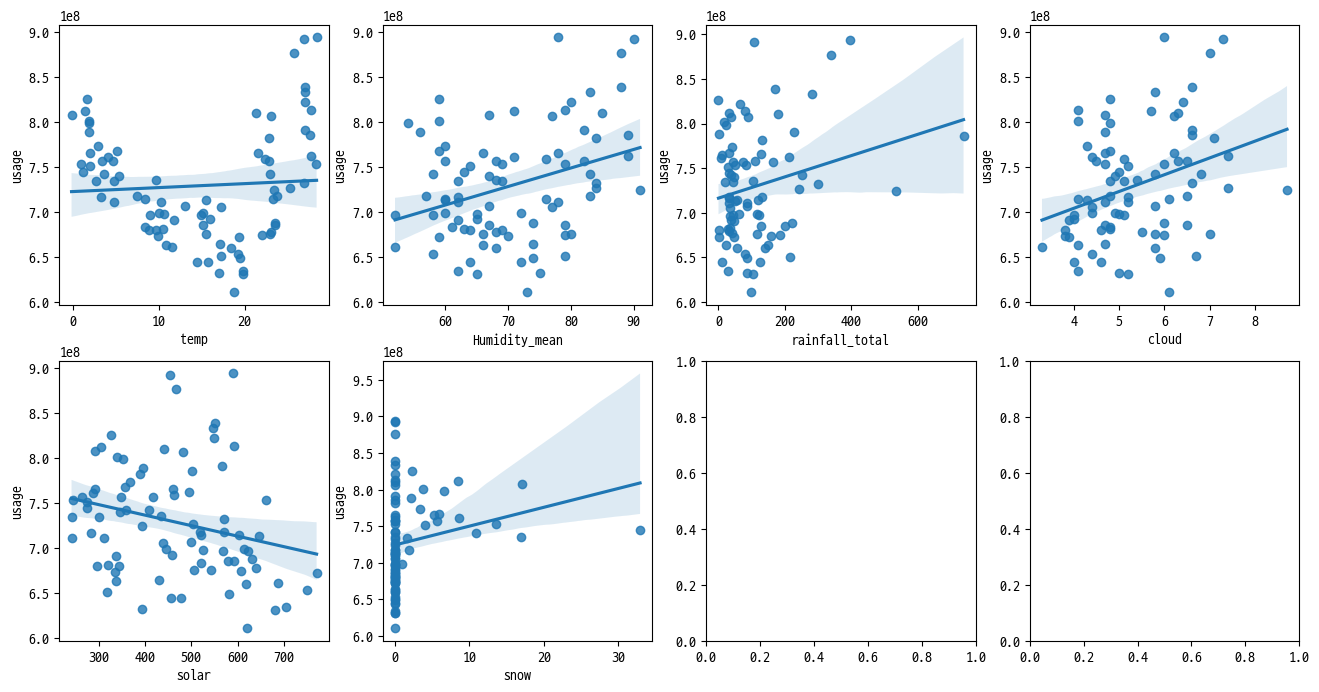

In [40]:
weather_kw_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
for i , feature in enumerate(weather_kw_df):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'usage', data = kw_df, ax = axs[row][col])

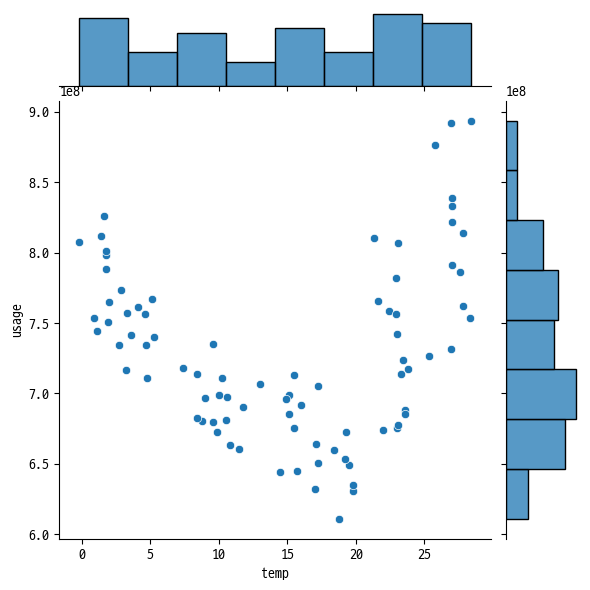

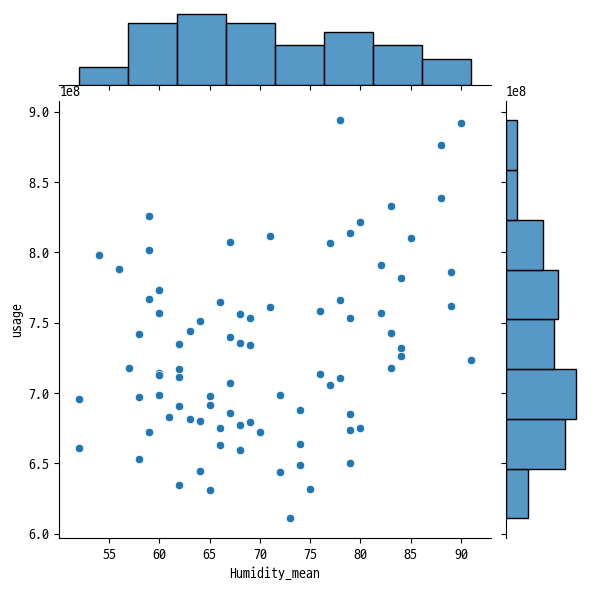

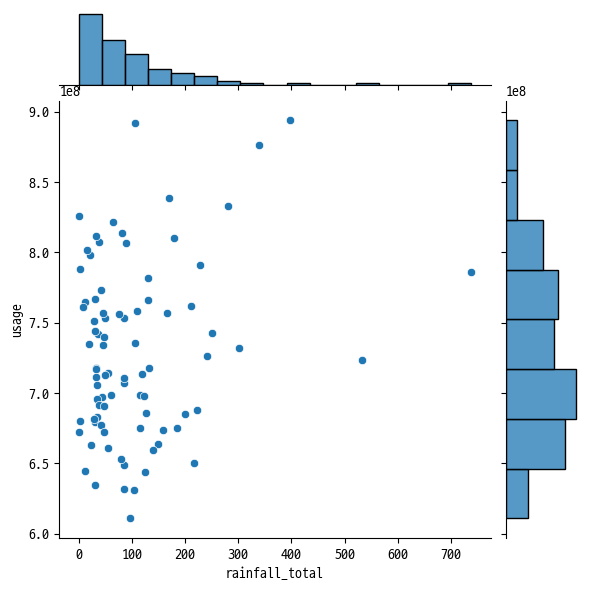

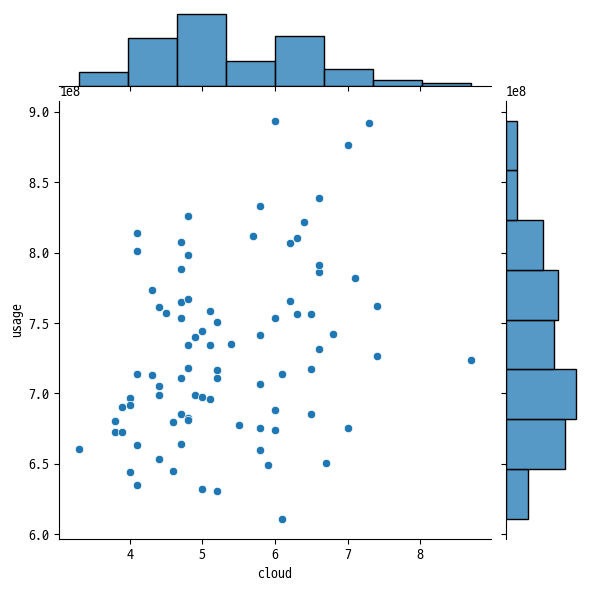

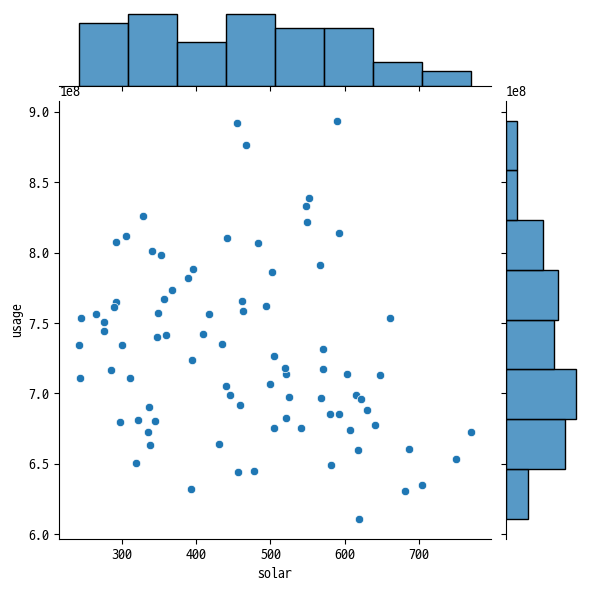

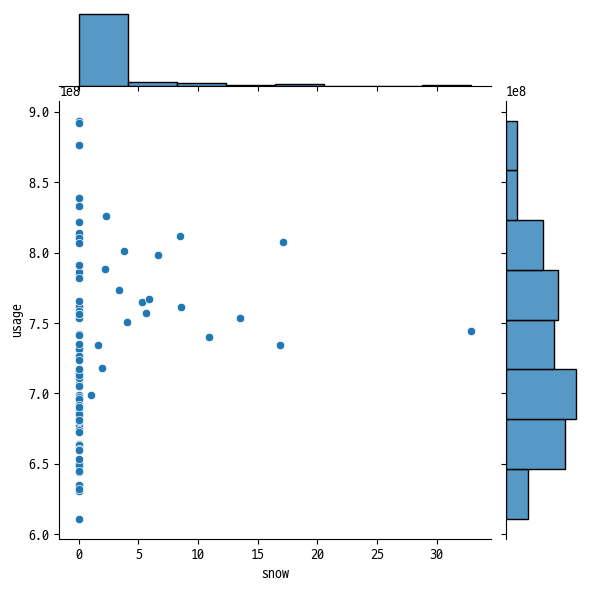

In [41]:
weather_kw_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']

for feature in weather_kw_df:
    sns.jointplot(x = feature, y = 'usage', data = kw_df)

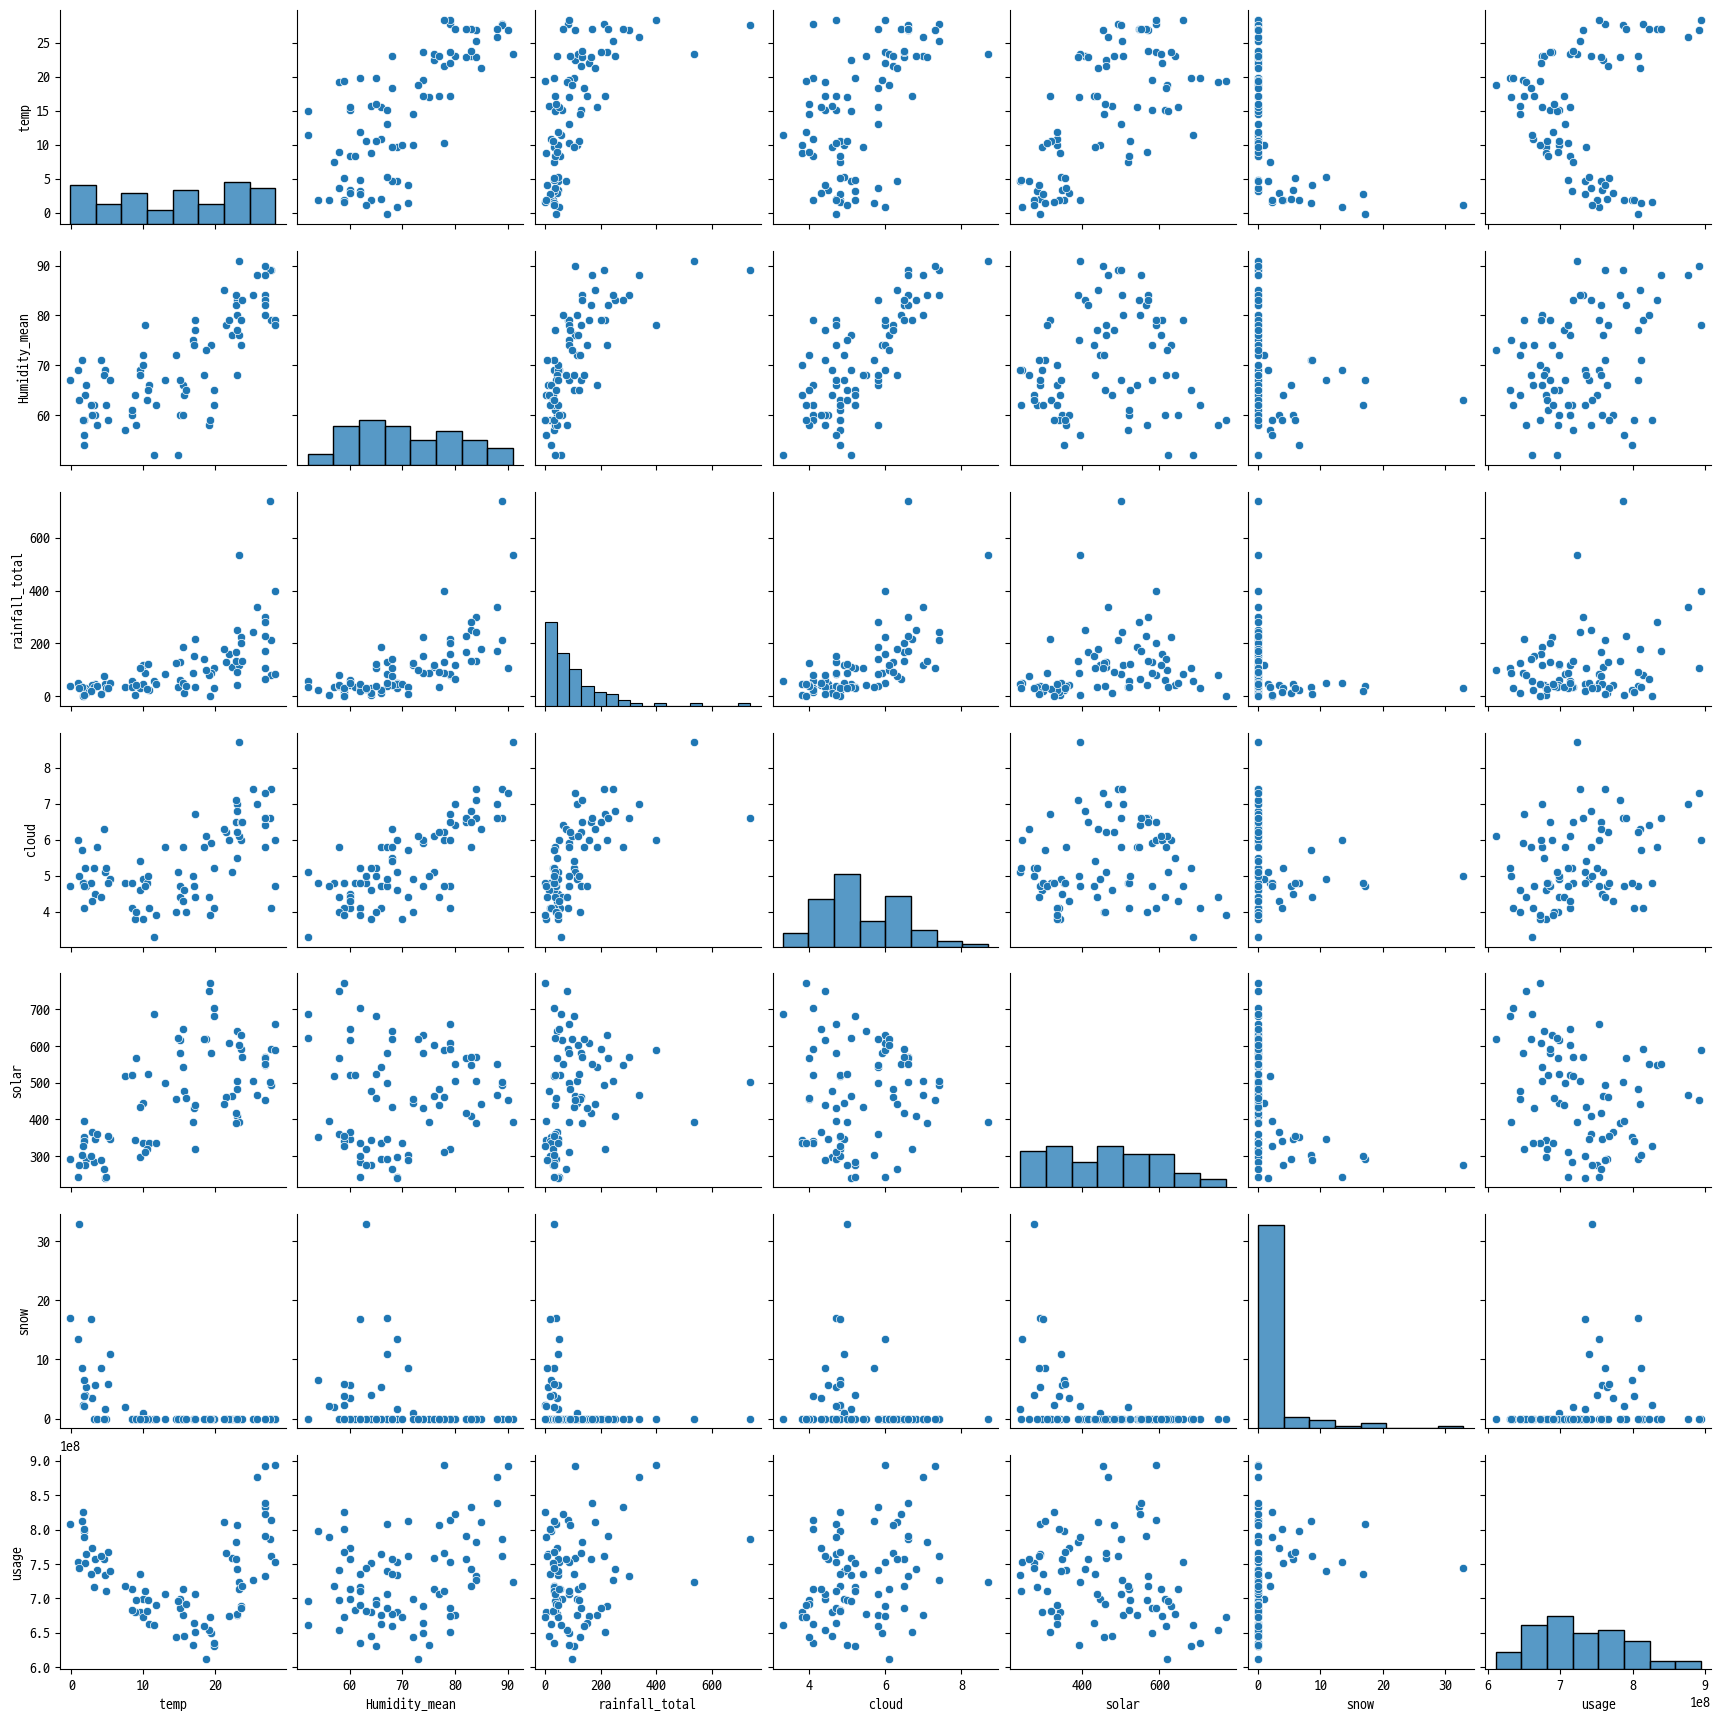

In [42]:
sns.pairplot(kw_df, vars=['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'])

In [ ]:
# Scatter plot 생성
scatter = go.Scatter(x=kw_df['temp'], y=kw_df['usage'], mode='markers', 
                     marker=dict(size=kw_df['Humidity_mean'],
                                 color=kw_df['rainfall_total'], colorscale='Viridis'))

# 레이아웃 생성
layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': '기온'}, 
                   yaxis={'title': '전력량'}, hovermode='closest')

# 그래프 생성
fig = go.Figure(data=[scatter], layout=layout)

# 그래프 출력
fig.show()

In [ ]:
weather_kw_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']

for feature in weather_kw_df:
       # Scatter plot 생성
       scatter = go.Scatter(x=kw_df['temp'], y=kw_df['usage'], mode='markers', 
                            marker=dict(size=kw_df['Humidity_mean'],
                                   color=kw_df['rainfall_total'], colorscale='Viridis'))

       # 레이아웃 생성
       layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': '기온'}, 
                     yaxis={'title': '전력량'}, hovermode='closest')

       # 그래프 생성
       fig = go.Figure(data=[scatter], layout=layout)

       # 그래프 출력
       fig.show()